In [ ]:
!git clone https://github.com/nlp-with-transformers/notebooks.git
%cd notebooks
from install import *
install_requirements()

Cloning into 'notebooks'...
remote: Enumerating objects: 515, done.
remote: Counting objects: 100% (162/162), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 515 (delta 139), reused 127 (delta 123), pack-reused 353
Receiving objects: 100% (515/515), 28.61 MiB | 29.04 MiB/s, done.
Resolving deltas: 100% (246/246), done.
/content/notebooks
⏳ Installing base requirements ...
✅ Base requirements installed!
⏳ Installing Git LFS ...
✅ Git LFS installed!


In [ ]:
from utils import *
setup_chapter()

Using transformers v4.11.3
Using datasets v1.16.1


# Dataset

In [ ]:
## IOB 2 data format
import pandas as pd

In [ ]:
tokens = "Jeff Dean is a computer scientist at Google in California".split()

In [ ]:
lbls = ["B-PER", "I-PER", "O", "O", "O", "O", "O", "B-ORG", "O", "B-LOC"]

In [ ]:
df = pd.DataFrame([tokens,lbls], index = ['Tokens','Tags'])


In [ ]:
df

,0,1,2,3,4,5,6,7,8,9
Tokens,Jeff,Dean,is,a,computer,scientist,at,Google,in,California
Tags,B-PER,I-PER,O,O,O,O,O,B-ORG,O,B-LOC


In [ ]:
pd.DataFrame(list(zip(tokens,lbls)), columns = ['Tokens','Labels'])

,Tokens,Labels
0,Jeff,B-PER
1,Dean,I-PER
2,is,O
3,a,O
4,computer,O
5,scientist,O
6,at,O
7,Google,B-ORG
8,in,O
9,California,B-LOC


In [ ]:
## Load Dataset, XTREME has multiple domains. First lets know about the PAN_X subsets within XTREME

In [ ]:
from datasets import get_dataset_config_names

In [ ]:
config_xtreme = get_dataset_config_names("xtreme")

Downloading:   0%|          | 0.00/9.04k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/23.1k [00:00<?, ?B/s]

In [ ]:
len(config_xtreme)

183

In [ ]:
panx_subsets = [s for s in config_xtreme if s.startswith("PAN")]

In [ ]:
panx_subsets

['PAN-X.af',
 'PAN-X.ar',
 'PAN-X.bg',
 'PAN-X.bn',
 'PAN-X.de',
 'PAN-X.el',
 'PAN-X.en',
 'PAN-X.es',
 'PAN-X.et',
 'PAN-X.eu',
 'PAN-X.fa',
 'PAN-X.fi',
 'PAN-X.fr',
 'PAN-X.he',
 'PAN-X.hi',
 'PAN-X.hu',
 'PAN-X.id',
 'PAN-X.it',
 'PAN-X.ja',
 'PAN-X.jv',
 'PAN-X.ka',
 'PAN-X.kk',
 'PAN-X.ko',
 'PAN-X.ml',
 'PAN-X.mr',
 'PAN-X.ms',
 'PAN-X.my',
 'PAN-X.nl',
 'PAN-X.pt',
 'PAN-X.ru',
 'PAN-X.sw',
 'PAN-X.ta',
 'PAN-X.te',
 'PAN-X.th',
 'PAN-X.tl',
 'PAN-X.tr',
 'PAN-X.ur',
 'PAN-X.vi',
 'PAN-X.yo',
 'PAN-X.zh']

In [ ]:
## The suffixes are language codes

In [ ]:
## To load german, we need de as input

In [ ]:
from datasets import load_dataset

In [ ]:
load_dataset("xtreme", name = "PAN-X.de")

Downloading:   0%|          | 0.00/234M [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset xtreme downloaded and prepared to /root/.cache/huggingface/datasets/xtreme/PAN-X.de/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    validation: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
    train: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 20000
    })
})

In [ ]:
### Building dataset according to different languages

In [ ]:
from collections import defaultdict
from datasets import DatasetDict

In [ ]:
DatasetDict?

In [ ]:
defaultdict?

In [ ]:
# Returns a dataset dict if key doesn't exist

In [ ]:
panx_ch = defaultdict(DatasetDict)

In [ ]:
panx_ch

defaultdict(datasets.dataset_dict.DatasetDict, {})

In [ ]:
langs = ["de", "fr", "it", "en"]
fracs = [0.629, 0.229, 0.084, 0.059]

In [ ]:
for lang, frac in zip(langs, fracs):
  ds = load_dataset("xtreme", name = f"PAN-X.{lang}")

  ## Shuffle and downsample each split according to spoken proportion
  for split in ds:
    panx_ch[lang][split]  = (ds[split].shuffle(seed=0).select(range(int(frac*ds[split].num_rows))))

  0%|          | 0/3 [00:00<?, ?it/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset xtreme downloaded and prepared to /root/.cache/huggingface/datasets/xtreme/PAN-X.fr/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset xtreme downloaded and prepared to /root/.cache/huggingface/datasets/xtreme/PAN-X.it/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset xtreme downloaded and prepared to /root/.cache/huggingface/datasets/xtreme/PAN-X.en/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
panx_ch

defaultdict(datasets.dataset_dict.DatasetDict,
            {'de': DatasetDict({
                 validation: Dataset({
                     features: ['tokens', 'ner_tags', 'langs'],
                     num_rows: 6290
                 })
                 test: Dataset({
                     features: ['tokens', 'ner_tags', 'langs'],
                     num_rows: 6290
                 })
                 train: Dataset({
                     features: ['tokens', 'ner_tags', 'langs'],
                     num_rows: 12580
                 })
             }),
             'fr': DatasetDict({
                 validation: Dataset({
                     features: ['tokens', 'ner_tags', 'langs'],
                     num_rows: 2290
                 })
                 test: Dataset({
                     features: ['tokens', 'ner_tags', 'langs'],
                     num_rows: 2290
                 })
                 train: Dataset({
                     features: ['tokens', 'ner_tags', 'la

In [ ]:
## Inspecting element
element = panx_ch["de"]["train"][0]

In [ ]:
print(element)

{'tokens': ['2.000', 'Einwohnern', 'an', 'der', 'Danziger', 'Bucht', 'in',
'der', 'polnischen', 'Woiwodschaft', 'Pommern', '.'], 'ner_tags': [0, 0, 0, 0,
5, 6, 0, 0, 5, 5, 6, 0], 'langs': ['de', 'de', 'de', 'de', 'de', 'de', 'de',
'de', 'de', 'de', 'de', 'de']}


In [ ]:
for key, value in panx_ch["de"]["train"].features.items():
    print(f"{key}: {value}")

tokens: Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)
ner_tags: Sequence(feature=ClassLabel(num_classes=7, names=['O', 'B-PER',
'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], names_file=None, id=None),
length=-1, id=None)
langs: Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)


In [ ]:
tags = panx_ch["de"]["train"].features["ner_tags"].feature

In [ ]:
print(tags)

ClassLabel(num_classes=7, names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG',
'B-LOC', 'I-LOC'], names_file=None, id=None)


In [ ]:
### class label to names
tags.names

['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC']

In [ ]:
def create_tag_names(batch):
  return {"ner_tags_str":[tags.int2str(idx) for idx in batch["ner_tags"]]}

In [ ]:
panx_de = panx_ch["de"].map(create_tag_names)

  0%|          | 0/6290 [00:00<?, ?ex/s]

  0%|          | 0/6290 [00:00<?, ?ex/s]

  0%|          | 0/12580 [00:00<?, ?ex/s]

In [ ]:
print(panx_de["train"][10])

{'tokens': ['Als', 'Bestandteil', 'des', 'Chianti', 'ist', 'die', 'Sorte',
'vor', 'allem', 'in', 'der', 'Toskana', 'verbreitet', '.'], 'ner_tags': [0, 0,
0, 5, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0], 'langs': ['de', 'de', 'de', 'de', 'de',
'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de'], 'ner_tags_str': ['O',
'O', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LOC', 'O', 'O']}


In [ ]:
de_example = panx_de["train"][0]
pd.DataFrame([de_example["tokens"], de_example["ner_tags_str"]],
['Tokens', 'Tags'])
     

,0,1,2,3,4,5,6,7,8,9,10,11
Tokens,2.000,Einwohnern,an,der,Danziger,Bucht,in,der,polnischen,Woiwodschaft,Pommern,.
Tags,O,O,O,O,B-LOC,I-LOC,O,O,B-LOC,B-LOC,I-LOC,O


#### Distribution of each entity

In [ ]:
from collections import Counter

In [ ]:
Counter?

In [ ]:
split2freqs = defaultdict(Counter)

In [ ]:
split2freqs

defaultdict(collections.Counter, {})

In [ ]:
panx_de.items()

dict_items([('validation', Dataset({
    features: ['tokens', 'ner_tags', 'langs', 'ner_tags_str'],
    num_rows: 6290
})), ('test', Dataset({
    features: ['tokens', 'ner_tags', 'langs', 'ner_tags_str'],
    num_rows: 6290
})), ('train', Dataset({
    features: ['tokens', 'ner_tags', 'langs', 'ner_tags_str'],
    num_rows: 12580
}))])

In [ ]:
split2freqs = defaultdict(Counter)
for split, dataset in panx_de.items():
    for row in dataset["ner_tags_str"]:
        for tag in row:
            if tag.startswith("B"):
                tag_type = tag.split("-")[1]
                split2freqs[split][tag_type] += 1
          

In [ ]:
pd.DataFrame.from_dict(split2freqs, orient="index")
     

,ORG,LOC,PER
validation,2683,3172,2893
test,2573,3180,3071
train,5366,6186,5810


# Multi lingual transformers

Simmilar to monolingual transformers with the difference being these are trained on multiple languages at once. A remarkable thing is that despite receiving no specific instruction, the model can generalize accross all languages. This is called as Cross Linual Transfer.

Can be trained in 3 ways:
1. en: Fine Tune on English and then evaluate on each language's test set.

2. each: fine tune and evaluate on monolingual data to measure per language performance

3. all: fine tune on all the training data to evaluate on each language test set.

# Tokenizers

xlmr uses SentencePiece Tokenizer instead of Word Piece that is used by BERT

In [ ]:
from transformers import AutoTokenizer

In [ ]:
bert_model_name = "bert-base-cased"
xlmr_model_name = "xlm-roberta-base"
bert_tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
xlmr_tokenizer = AutoTokenizer.from_pretrained(xlmr_model_name)

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/615 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.68M [00:00<?, ?B/s]

In [ ]:
text = "Jack Sparrow loves New Delhi"
bert_tokens = bert_tokenizer(text).tokens()
xlmr_tokens = xlmr_tokenizer(text).tokens()

In [ ]:
bert_tokens

['[CLS]', 'Jack', 'Spa', '##rrow', 'loves', 'New', 'Delhi', '[SEP]']

In [ ]:
xlmr_tokens

['<s>', '▁Jack', '▁Spar', 'row', '▁love', 's', '▁New', '▁Delhi', '</s>']

In [ ]:
pd.DataFrame(zip(bert_tokens, xlmr_tokens), columns = ['bert','xlmr_roberta'])

,bert,xlmr_roberta
0,[CLS],<s>
1,Jack,▁Jack
2,Spa,▁Spar
3,##rrow,row
4,loves,▁love
5,New,s
6,Delhi,▁New
7,[SEP],▁Delhi


### Tokenizer Pipeline

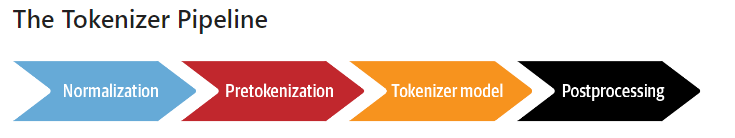


1. Normalization: Stripping whitespace, removing accents etc

2. Pretokenization: Splitting sentences into words.

3. Tokenizer Model: Actual model which does subword tokenozation.

4. Postprocessing: Add special tokens like [CLS] and [SEP]

# Sentence Piece vs Word Piece:

1. Uses unicode characters to perform encoding, so it makes the tokenizer language agnostic.

2. Whitespace assigned special Unicode character : U+2581 or the _ character 

In [ ]:
"".join(xlmr_tokens)  ## Observe white space has _ character instead of whitespace

'<s>▁Jack▁Sparrow▁loves▁New▁Delhi</s>'

In [ ]:
"".join(xlmr_tokens).replace(u"\u2581"," ")

'<s> Jack Sparrow loves New Delhi</s>'

# How NER works

Unlike Text classification, where we use the special [CLS] token to perform classification, in NER we use all the tokens and perform classification on each token according to IOB2 strategy. For subwords, ex: Rachinder, if this gets broken to "Rachin" and "##der" , only one of these can be classifier as B-PER. So which one should be selected?? IN BERT paper, the first token was used.


# Anatomy of Transformers

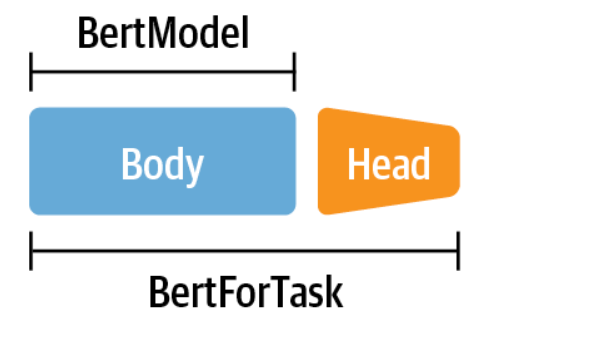

Body is task agnostic whereas head is task specific

# Custom Model for Token Classification

In [ ]:
import torch.nn as nn
from transformers import XLMRobertaConfig
from transformers.modeling_outputs import TokenClassifierOutput
from transformers.models.roberta.modeling_roberta import RobertaModel
from transformers.models.roberta.modeling_roberta import RobertaPreTrainedModel

In [ ]:
# The bare RoBERTa Model transformer outputting raw hidden-states without any specific head on top.
RobertaModel?

In [ ]:
class XLMRobertaForTokenClassification(RobertaPreTrainedModel):
  config_class = XLMRobertaConfig

  def __init__(self, config):
    super().__init__(config)  ## For custom configuration, can overwrite this
    self.num_labels = config.num_labels
    self.roberta = RobertaModel(config, add_pooling_layer=False) ### return all hidden states, 
    self.dropout = nn.Dropout(config.hidden_dropout_prob)
    self.classifier = nn.Linear(config.hidden_size, config.num_labels)
    self.init_weights()

  def forward(self, input_ids = None, attention_mask = None, token_type_ids = None, labels = None, **kwargs):
    outputs = self.roberta(input_ids, attention_mask=attention_mask,
                               token_type_ids=token_type_ids, **kwargs)
    # Apply classifier to encoder representation
    sequence_output = self.dropout(outputs[0])
    logits = self.classifier(sequence_output)
    # Calculate losses
    loss = None
    if labels is not None:
        loss_fct = nn.CrossEntropyLoss()
        loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
    # Return model output object
    return TokenClassifierOutput(loss=loss, logits=logits, 
                                  hidden_states=outputs.hidden_states, 
                                  attentions=outputs.attentions)  ### Token classifier output: specially for ner, Allows elements to be accessed as named tuple

In [ ]:
TokenClassifierOutput?

# Loading custom model

In [ ]:
tags

ClassLabel(num_classes=7, names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], names_file=None, id=None)

In [ ]:
tags.names

['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC']

In [ ]:
index2tag = {idx:tag for idx,tag in enumerate(tags.names)} # will be passed while loading the model

In [ ]:
tag2index = {tag:idx for idx,tag in enumerate(tags.names)} # will be passed while loading the model

In [ ]:
tag2index

{'O': 0,
 'B-PER': 1,
 'I-PER': 2,
 'B-ORG': 3,
 'I-ORG': 4,
 'B-LOC': 5,
 'I-LOC': 6}

In [ ]:
index2tag

{0: 'O',
 1: 'B-PER',
 2: 'I-PER',
 3: 'B-ORG',
 4: 'I-ORG',
 5: 'B-LOC',
 6: 'I-LOC'}

In [ ]:
from transformers import AutoConfig

In [ ]:
xlmr_config = AutoConfig.from_pretrained(xlmr_model_name, num_labels = tags.num_classes, id2label = index2tag, label2id = tag2index)

In [ ]:
xlmr_config

XLMRobertaConfig {
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "O",
    "1": "B-PER",
    "2": "I-PER",
    "3": "B-ORG",
    "4": "I-ORG",
    "5": "B-LOC",
    "6": "I-LOC"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "B-LOC": 5,
    "B-ORG": 3,
    "B-PER": 1,
    "I-LOC": 6,
    "I-ORG": 4,
    "I-PER": 2,
    "O": 0
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.11.3",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 250002
}

# Loading weights

In [ ]:
import torch

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
xlmr_model = (XLMRobertaForTokenClassification
              .from_pretrained(xlmr_model_name, config=xlmr_config)
              .to(device))


Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

# Quick Check  ----- Inference on new data points

In [ ]:
xlmr_tokenizer.encode(text, return_tensors="pt")

tensor([[    0, 21763, 37456, 15555,  5161,     7,  2356, 55892,     2]])

In [ ]:
xlmr_tokenizer.encode(text)

[0, 21763, 37456, 15555, 5161, 7, 2356, 55892, 2]

In [ ]:
input_ids = xlmr_tokenizer.encode(text, return_tensors="pt")

In [ ]:
pd.DataFrame([xlmr_tokens, input_ids.numpy()[0]], index=["Tokens", "Input IDs"])

,0,1,2,3,4,5,6,7,8
Tokens,<s>,▁Jack,▁Spar,row,▁love,s,▁New,▁Delhi,</s>
Input IDs,0,21763,37456,15555,5161,7,2356,55892,2


In [ ]:
#### Predictions from the model

In [ ]:
input_ids

tensor([[    0, 21763, 37456, 15555,  5161,     7,  2356, 55892,     2]])

In [ ]:
xlmr_model?

In [ ]:
xlmr_model(input_ids.to(device))

TokenClassifierOutput(loss=None, logits=tensor([[[ 1.2996e-01, -4.1146e-01,  7.4183e-01,  2.6893e-01, -1.0163e+00,
           7.5986e-01,  5.5911e-01],
         [-8.3882e-04, -3.5648e-01,  9.2237e-01,  2.0807e-01, -7.2730e-01,
           8.2072e-01,  4.3970e-01],
         [ 8.2261e-02, -2.5124e-01,  8.4715e-01,  8.8635e-02, -6.8839e-01,
           8.7300e-01,  4.7641e-01],
         [ 1.6875e-02, -2.9912e-01,  9.4321e-01,  1.1051e-01, -5.8859e-01,
           7.9634e-01,  4.4986e-01],
         [ 3.6878e-02, -3.3110e-01,  8.4683e-01,  8.2024e-02, -7.2308e-01,
           8.0721e-01,  4.3905e-01],
         [ 4.5334e-02, -3.2515e-01,  8.9112e-01,  1.6561e-01, -7.6206e-01,
           7.5763e-01,  3.9507e-01],
         [ 2.6412e-03, -4.3862e-01,  8.3806e-01,  2.3020e-01, -7.4665e-01,
           7.7312e-01,  4.5738e-01],
         [-1.3302e-01, -2.6011e-01,  8.7446e-01,  2.9675e-01, -7.1096e-01,
           8.7858e-01,  3.6785e-01],
         [ 1.1140e-01, -3.9600e-01,  7.3127e-01,  2.4273e-01, -9

In [ ]:

outputs = xlmr_model(input_ids.to(device)).logits

In [ ]:
predictions = torch.argmax(outputs, dim=-1)

In [ ]:
outputs.shape

torch.Size([1, 9, 7])

In [ ]:
[tags.names[p] for p in predictions[0]]

['B-LOC',
 'I-PER',
 'B-LOC',
 'I-PER',
 'I-PER',
 'I-PER',
 'I-PER',
 'B-LOC',
 'B-LOC']

In [ ]:
preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
pd.DataFrame([xlmr_tokens, preds], index=["Tokens", "Tags"])

,0,1,2,3,4,5,6,7,8
Tokens,<s>,▁Jack,▁Spar,row,▁love,s,▁New,▁Delhi,</s>
Tags,B-LOC,I-PER,B-LOC,I-PER,I-PER,I-PER,I-PER,B-LOC,B-LOC


In [ ]:
#### Inference function

def tag_text(text, tags, model, tokenizer):
    # Get tokens with special characters
    tokens = tokenizer(text).tokens()
    # Encode the sequence into IDs
    input_ids = xlmr_tokenizer(text, return_tensors="pt").input_ids.to(device)
    # Get predictions as distribution over 7 possible classes
    outputs = model(input_ids)[0]
    # Take argmax to get most likely class per token
    predictions = torch.argmax(outputs, dim=2)
    # Convert to DataFrame
    preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
    return pd.DataFrame([tokens, preds], index=["Tokens", "Tags"])

# Tokenize Texts for NER

In [ ]:
de_example

{'tokens': ['2.000',
  'Einwohnern',
  'an',
  'der',
  'Danziger',
  'Bucht',
  'in',
  'der',
  'polnischen',
  'Woiwodschaft',
  'Pommern',
  '.'],
 'ner_tags': [0, 0, 0, 0, 5, 6, 0, 0, 5, 5, 6, 0],
 'langs': ['de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de',
  'de'],
 'ner_tags_str': ['O',
  'O',
  'O',
  'O',
  'B-LOC',
  'I-LOC',
  'O',
  'O',
  'B-LOC',
  'B-LOC',
  'I-LOC',
  'O']}

In [ ]:
words, labels = de_example["tokens"], de_example["ner_tags"]


In [ ]:
de_example["tokens"]

['2.000',
 'Einwohnern',
 'an',
 'der',
 'Danziger',
 'Bucht',
 'in',
 'der',
 'polnischen',
 'Woiwodschaft',
 'Pommern',
 '.']

In [ ]:

tokenized_input = xlmr_tokenizer(de_example["tokens"], is_split_into_words=True) # is_split_into_words reflects words have already been  split into words

In [ ]:
tokenized_input

{'input_ids': [0, 70101, 176581, 19, 142, 122, 2290, 708, 1505, 18363, 18, 23, 122, 127474, 15439, 13787, 14, 15263, 18917, 663, 6947, 19, 6, 5, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
xlmr_tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])

['<s>',
 '▁2.000',
 '▁Einwohner',
 'n',
 '▁an',
 '▁der',
 '▁Dan',
 'zi',
 'ger',
 '▁Buch',
 't',
 '▁in',
 '▁der',
 '▁polni',
 'schen',
 '▁Wo',
 'i',
 'wod',
 'schaft',
 '▁Po',
 'mmer',
 'n',
 '▁',
 '.',
 '</s>']

In [ ]:
tokens = xlmr_tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])

In [ ]:
word_ids = tokenized_input.word_ids()

In [ ]:
### need to ensure that if a word gets split into subwords, the second subword should not be considered
#### So, we set the token to -100, this is because pytorch cross entropy loss ignores -100 

In [ ]:
previous_word_idx = None
label_ids = []

In [ ]:
for word_idx in word_ids:
  if word_idx is None or word_idx == previous_word_idx:
    label_ids.append(-100)

  elif word_idx != previous_word_idx:
    label_ids.append(labels[word_idx])
  previous_word_idx = word_idx

In [ ]:
labels = [index2tag[l] if l != -100 else "IGN" for l in label_ids]
index = ["Tokens", "Word IDs", "Label IDs", "Labels"]

pd.DataFrame([tokens, word_ids, label_ids, labels], index=index)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>
Word IDs,None,0,1,1,2,3,4,4,4,5,...,9,9,9,9,10,10,10,11,11,None
Label IDs,-100,0,0,-100,0,0,5,-100,-100,6,...,5,-100,-100,-100,6,-100,-100,0,-100,-100
Labels,IGN,O,O,IGN,O,O,B-LOC,IGN,IGN,I-LOC,...,B-LOC,IGN,IGN,IGN,I-LOC,IGN,IGN,O,IGN,IGN


In [ ]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = xlmr_tokenizer(examples["tokens"], truncation=True, 
                                      is_split_into_words=True)
    labels = []
    for idx, label in enumerate(examples["ner_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=idx)
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            if word_idx is None or word_idx == previous_word_idx:
                label_ids.append(-100)
            else:
                label_ids.append(label[word_idx])
            previous_word_idx = word_idx
        labels.append(label_ids)
    tokenized_inputs["labels"] = labels
    return tokenized_inputs

In [ ]:
def encode_panx_dataset(corpus):
  return corpus.map(tokenize_and_align_labels, batched = True, remove_columns = ['langs', 'ner_tags','tokens'])

In [ ]:
panx_de_encoded = encode_panx_dataset(panx_ch["de"])

  0%|          | 0/7 [00:00<?, ?ba/s]

  0%|          | 0/7 [00:00<?, ?ba/s]

  0%|          | 0/13 [00:00<?, ?ba/s]

In [ ]:
panx_de_encoded

DatasetDict({
    validation: Dataset({
        features: ['attention_mask', 'input_ids', 'labels'],
        num_rows: 6290
    })
    test: Dataset({
        features: ['attention_mask', 'input_ids', 'labels'],
        num_rows: 6290
    })
    train: Dataset({
        features: ['attention_mask', 'input_ids', 'labels'],
        num_rows: 12580
    })
})

# Performance metrics

In [ ]:
#### seq val is a great library to generate scores for sequence evaluations

In [ ]:
from seqeval.metrics import classification_report

In [ ]:
y_true = [["O", "O", "O", "B-MISC", "I-MISC", "I-MISC", "O"],
          ["B-PER", "I-PER", "O"]]
y_pred = [["O", "O", "B-MISC", "I-MISC", "I-MISC", "I-MISC", "O"],
          ["B-PER", "I-PER", "O"]]

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

        MISC       0.00      0.00      0.00         1
         PER       1.00      1.00      1.00         1

   micro avg       0.50      0.50      0.50         2
   macro avg       0.50      0.50      0.50         2
weighted avg       0.50      0.50      0.50         2



In [ ]:
## seqeval expects the inputs to be list of lists

In [ ]:
import numpy as np

In [ ]:
def allign_predictions(predictions, label_ids):
  preds = np.argmax(predictions, axis = 2)
  batch_size, seq_len = preds.shape
  labels_list , preds_list = [],[]

  for batch_idx in range(batch_size):
    example_labels, example_preds = [],[]

    for seq_idx in range(seq_len):
      if label_ids[batch_idx, seq_idx] != -100:
        example_labels.append(index2tag[label_ids[batch_idx][seq_idx]])
        example_preds.append(index2tag[preds[batch_idx][seq_idx]])

      labels_list.append(example_labels)
      preds_list.append(example_preds)

  return preds_list, labels_list    



# Fine Tuning XLM-Roberta

In [ ]:
from transformers import TrainingArguments

In [ ]:
num_epochs = 3
batch_size = 24
logging_steps = len(panx_de_encoded["train"])// batch_size

In [ ]:
model_name = f"{xlmr_model_name}-finetuned-panx-de"

In [ ]:
training_args = TrainingArguments(
    output_dir = model_name, log_level = "error", num_train_epochs = num_epochs,
    per_device_train_batch_size=batch_size, per_device_eval_batch_size=batch_size,
    evaluation_strategy="epoch", save_steps=1e6, weight_decay=0.01, disable_tqdm = False,
    logging_steps = logging_steps)


In [ ]:
from seqeval.metrics import f1_score

In [ ]:
def compute_metrics(eval_predictions):
  y_pred, y_true = allign_predictions(eval_predictions.predictions, eval_predictions.label_ids)
  return {"f1":f1_score(y_true, y_pred)}

In [ ]:
from transformers import DataCollatorForTokenClassification ## pad the sequences

In [ ]:
## padding the sequeences
data_collator = DataCollatorForTokenClassification(xlmr_tokenizer)

In [ ]:
def model_init():
  return (XLMRobertaForTokenClassification.from_pretrained(xlmr_model_name, config = xlmr_config).to(device))

In [ ]:
from transformers import Trainer

In [ ]:
trainer = Trainer(model_init = model_init, args = training_args,
                  data_collator = data_collator, compute_metrics = compute_metrics, train_dataset = panx_de_encoded["train"],
                  eval_dataset = panx_de_encoded["validation"], tokenizer = xlmr_tokenizer)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,F1
1,0.258300,0.159615,0.823110
2,0.126200,0.139502,0.846774
3,0.082400,0.133884,0.865335


TrainOutput(global_step=1575, training_loss=0.1555365372460986, metrics={'train_runtime': 561.9805, 'train_samples_per_second': 67.155, 'train_steps_per_second': 2.803, 'total_flos': 863012377186080.0, 'train_loss': 0.1555365372460986, 'epoch': 3.0})

In [ ]:

# hide_output
text_de = "Jeff Dean ist ein Informatiker bei Google in Kalifornien"
tag_text(text_de, tags, trainer.model, xlmr_tokenizer)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Tokens,<s>,▁Jeff,▁De,an,▁ist,▁ein,▁Informati,ker,▁bei,▁Google,▁in,▁Kaliforni,en,</s>
Tags,O,B-PER,I-PER,I-PER,O,O,O,O,O,B-ORG,O,B-LOC,I-LOC,O


### Error Analysis

In [ ]:
from torch.nn.functional import cross_entropy

In [133]:
def forward_pass_with_labels(batch):
  ### dict of lists to list of dicts suitable for data collator
  features = [dict(zip(batch,t)) for t in zip(*batch.values())]
  batch = data_collator(features)
  input_ids = batch["input_ids"].to(device)
  attention_mask = batch["attention_mask"].to(device)
  labels = batch["labels"].to(device)
  with torch.no_grad():
    output = trainer.model(input_ids, attention_mask)
    predicted_label = torch.argmax(output.logits, axis=-1).cpu().numpy()
  loss = cross_entropy(output.logits.view(-1,7), labels.view(-1), reduction = "none")
  loss = loss.view(len(input_ids), -1).cpu().numpy()

  return {"loss":loss, "predicted_label": predicted_label}

In [134]:
valid_set = panx_de_encoded["validation"]

In [136]:
valid_set = valid_set.map(forward_pass_with_labels, batched =True, batch_size = 32)

  0%|          | 0/197 [00:00<?, ?ba/s]

In [141]:
df = valid_set.to_pandas()
index2tag[-100] = "IGN"
df["input_tokens"] = df["input_ids"].apply(
    lambda x: xlmr_tokenizer.convert_ids_to_tokens(x))
df["predicted_label"] = df["predicted_label"].apply(
    lambda x: [index2tag[i] for i in x])
df["labels"] = df["labels"].apply(
    lambda x: [index2tag[i] for i in x])
df['loss'] = df.apply(
    lambda x: x['loss'][:len(x['input_ids'])], axis=1)
df['predicted_label'] = df.apply(
    lambda x: x['predicted_label'][:len(x['input_ids'])], axis=1)
df.head(1)

,attention_mask,input_ids,labels,loss,predicted_label,input_tokens
0,"[1, 1, 1, 1, 1, 1, 1]","[0, 10699, 11, 15, 16104, 1388, 2]","[IGN, B-ORG, IGN, I-ORG, I-ORG, I-ORG, IGN]","[0.0, 0.009608569, 0.0, 0.013912721, 0.0113531...","[O, B-ORG, I-ORG, I-ORG, I-ORG, I-ORG, O]","[<s>, ▁Ham, a, ▁(, ▁Unternehmen, ▁), </s>]"


In [145]:
## Transform each element of a list-like to a row.

In [149]:
pd.Series.explode?

In [151]:
df_tokens = df.apply(pd.Series.explode)

In [152]:
df_tokens.head()

,attention_mask,input_ids,labels,loss,predicted_label,input_tokens
0,1,0,IGN,0.0,O,<s>
0,1,10699,B-ORG,0.009609,B-ORG,▁Ham
0,1,11,IGN,0.0,I-ORG,a
0,1,15,I-ORG,0.013913,I-ORG,▁(
0,1,16104,I-ORG,0.011353,I-ORG,▁Unternehmen


In [153]:

df_tokens = df_tokens.query("labels != 'IGN'")

In [154]:
df_tokens["loss"] = df_tokens["loss"].astype(float).round(2)

In [155]:
df_tokens.head()

,attention_mask,input_ids,labels,loss,predicted_label,input_tokens
0,1,10699,B-ORG,0.01,B-ORG,▁Ham
0,1,15,I-ORG,0.01,I-ORG,▁(
0,1,16104,I-ORG,0.01,I-ORG,▁Unternehmen
0,1,1388,I-ORG,0.01,I-ORG,▁)
1,1,56530,O,0.00,O,▁WE


In [156]:
(
    df_tokens.groupby("input_tokens")[["loss"]]
    .agg(["count", "mean", "sum"])
    .droplevel(level=0, axis=1)  # Get rid of multi-level columns
    .sort_values(by="sum", ascending=False)
    .reset_index()
    .round(2)
    .head(10)
    .T
)

,0,1,2,3,4,5,6,7,8,9
input_tokens,▁,▁in,▁der,▁von,▁/,▁und,▁(,▁'',▁),▁A
count,6066,989,1388,808,163,1171,246,2898,246,125
mean,0.04,0.13,0.08,0.13,0.54,0.07,0.27,0.02,0.23,0.46
sum,216.35,127.15,116.91,107.49,87.35,86.45,66.34,63.39,57.35,57.2


In [157]:
(
    df_tokens.groupby("labels")[["loss"]] 
    .agg(["count", "mean", "sum"])
    .droplevel(level=0, axis=1)
    .sort_values(by="mean", ascending=False)
    .reset_index()
    .round(2)
    .T
)

,0,1,2,3,4,5,6
labels,I-LOC,B-ORG,I-ORG,B-LOC,B-PER,I-PER,O
count,1462,2683,3820,3172,2893,4139,43648
mean,0.62,0.6,0.47,0.33,0.27,0.17,0.03
sum,900.23,1607.4,1780.69,1049.73,775.15,723.85,1400.28


In [158]:

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

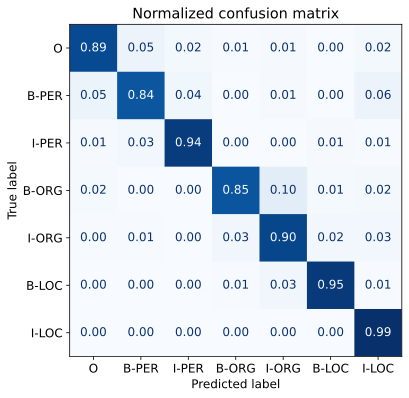

In [159]:
plot_confusion_matrix(df_tokens["labels"], df_tokens["predicted_label"],
                      tags.names)

In [160]:
# hide_output
def get_samples(df):
    for _, row in df.iterrows():
        labels, preds, tokens, losses = [], [], [], []
        for i, mask in enumerate(row["attention_mask"]):
            if i not in {0, len(row["attention_mask"])}:
                labels.append(row["labels"][i])
                preds.append(row["predicted_label"][i])
                tokens.append(row["input_tokens"][i])
                losses.append(f"{row['loss'][i]:.2f}")
        df_tmp = pd.DataFrame({"tokens": tokens, "labels": labels, 
                               "preds": preds, "losses": losses}).T
        yield df_tmp

df["total_loss"] = df["loss"].apply(sum)
df_tmp = df.sort_values(by="total_loss", ascending=False).head(3)

for sample in get_samples(df_tmp):
    display(sample)
     

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
tokens,▁',▁'',▁Τ,Κ,▁'',▁',▁',▁'',▁T,▁'',▁',ri,▁'',▁',k,▁'',▁',ala,</s>
labels,O,O,O,IGN,O,O,B-LOC,I-LOC,I-LOC,I-LOC,I-LOC,IGN,I-LOC,I-LOC,IGN,I-LOC,I-LOC,IGN,IGN
preds,O,O,B-ORG,I-ORG,O,O,O,O,B-ORG,O,O,O,O,O,O,O,O,O,O
losses,0.00,0.00,3.75,0.00,0.00,0.00,10.51,10.15,8.06,7.29,7.51,0.00,7.56,8.05,0.00,7.87,8.05,0.00,0.00


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
tokens,▁'',8,.,▁Juli,▁'',▁:,▁Protest,camp,▁auf,▁dem,▁Gelände,▁der,▁Republika,n,ischen,▁Gar,de,</s>
labels,B-ORG,IGN,IGN,I-ORG,I-ORG,I-ORG,I-ORG,IGN,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,IGN,IGN,I-ORG,IGN,IGN
preds,O,O,O,O,O,O,O,O,O,O,O,O,B-ORG,I-ORG,I-ORG,I-ORG,I-ORG,O
losses,8.47,0.00,0.00,8.39,8.77,8.72,7.19,0.00,7.99,8.59,6.96,4.62,3.85,0.00,0.00,0.02,0.00,0.00


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
tokens,▁United,▁Nations,▁Multi,dimensional,▁Integra,ted,▁Stabil,ization,▁Mission,▁in,▁the,▁Central,▁African,▁Republic,</s>
labels,B-PER,I-PER,I-PER,IGN,I-PER,IGN,I-PER,IGN,I-PER,I-PER,I-PER,I-PER,I-PER,I-PER,IGN
preds,B-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG
losses,6.29,5.83,6.05,0.00,5.49,0.00,5.38,0.00,5.17,4.72,4.97,5.10,4.85,4.63,0.00


In [161]:
df_tmp = df.loc[df["input_tokens"].apply(lambda x: u"\u2581(" in x)].head(2)
for sample in get_samples(df_tmp):
    display(sample)

,0,1,2,3,4,5
tokens,▁Ham,a,▁(,▁Unternehmen,▁),</s>
labels,B-ORG,IGN,I-ORG,I-ORG,I-ORG,IGN
preds,B-ORG,I-ORG,I-ORG,I-ORG,I-ORG,O
losses,0.01,0.00,0.01,0.01,0.01,0.00


,0,1,2,3,4,5,6,7
tokens,▁Kesk,kül,a,▁(,▁Mart,na,▁),</s>
labels,B-LOC,IGN,IGN,I-LOC,I-LOC,IGN,I-LOC,IGN
preds,B-LOC,I-LOC,I-LOC,I-LOC,I-LOC,I-LOC,I-LOC,I-LOC
losses,0.04,0.00,0.00,0.02,0.02,0.00,0.02,0.00


# Cross Lingual Transfer

In [162]:

def get_f1_score(trainer, dataset):
    return trainer.predict(dataset).metrics["test_f1"]

In [163]:

f1_scores = defaultdict(dict)

In [164]:
f1_scores["de"]["de"] = get_f1_score(trainer, panx_de_encoded["test"])

In [165]:
f1_scores['de']['de']

0.8672356299101339

In [166]:

text_fr = "Jeff Dean est informaticien chez Google en Californie"
tag_text(text_fr, tags, trainer.model, xlmr_tokenizer)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Tokens,<s>,▁Jeff,▁De,an,▁est,▁informatic,ien,▁chez,▁Google,▁en,▁Cali,for,nie,</s>
Tags,O,B-PER,I-PER,I-PER,O,O,O,O,B-ORG,O,B-LOC,B-LOC,I-LOC,O


In [167]:

def evaluate_lang_performance(lang, trainer):
    panx_ds = encode_panx_dataset(panx_ch[lang])
    return get_f1_score(trainer, panx_ds["test"])

In [168]:
f1_scores["de"]["fr"] = evaluate_lang_performance("fr", trainer)

  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

In [169]:
f1_scores["de"]["fr"]

0.705163262023484

In [170]:
f1_scores["de"]["it"] = evaluate_lang_performance("it", trainer)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [171]:
f1_scores["de"]["it"]

0.6753794266441822

In [172]:
f1_scores["de"]["en"] = evaluate_lang_performance("en", trainer)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [173]:
f1_scores["de"]["en"]

0.586381541924592

### When does zero shot transfer make sense??

In [174]:
def train_on_subset(dataset, num_samples):
    train_ds = dataset["train"].shuffle(seed=42).select(range(num_samples))
    valid_ds = dataset["validation"]
    test_ds = dataset["test"]
    training_args.logging_steps = len(train_ds) // batch_size
    
    trainer = Trainer(model_init=model_init, args=training_args,
        data_collator=data_collator, compute_metrics=compute_metrics,
        train_dataset=train_ds, eval_dataset=valid_ds, tokenizer=xlmr_tokenizer)
    trainer.train()
    if training_args.push_to_hub:
        trainer.push_to_hub(commit_message="Training completed!")
    
    f1_score = get_f1_score(trainer, test_ds)
    return pd.DataFrame.from_dict(
        {"num_samples": [len(train_ds)], "f1_score": [f1_score]})

In [175]:
panx_fr_encoded = encode_panx_dataset(panx_ch["fr"])


  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

In [176]:
training_args.push_to_hub = False
metrics_df = train_on_subset(panx_fr_encoded, 250)
metrics_df

Epoch,Training Loss,Validation Loss,F1
1,1.797900,1.381488,0.103951
2,1.306200,1.135745,0.177569
3,1.085200,1.040954,0.181183


,num_samples,f1_score
0,250,0.16441


In [177]:
for num_samples in [500, 1000, 2000, 4000]:
    metrics_df = metrics_df.append(
        train_on_subset(panx_fr_encoded, num_samples), ignore_index=True)

Epoch,Training Loss,Validation Loss,F1
1,1.492500,1.051082,0.185522
2,0.899700,0.704920,0.572459
3,0.587200,0.585941,0.618498


<ipython-input-177-95404e7c65ac>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(


Epoch,Training Loss,Validation Loss,F1
1,1.210000,0.628003,0.579746
2,0.508500,0.413554,0.729393
3,0.322200,0.381819,0.765563


Epoch,Training Loss,Validation Loss,F1
1,0.793600,0.444528,0.702285
2,0.334100,0.359148,0.783166
3,0.221100,0.342364,0.812083


Epoch,Training Loss,Validation Loss,F1
1,0.615700,0.329278,0.786057
2,0.273400,0.294020,0.806831
3,0.182900,0.279986,0.835065


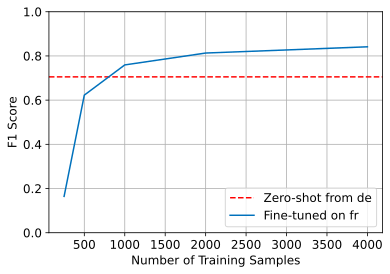

In [179]:

fig, ax = plt.subplots()
ax.axhline(f1_scores["de"]["fr"], ls="--", color="r")
metrics_df.set_index("num_samples").plot(ax=ax)
plt.legend(["Zero-shot from de", "Fine-tuned on fr"], loc="lower right")
plt.ylim((0, 1))
plt.xlabel("Number of Training Samples")
plt.ylabel("F1 Score")
plt.grid()
plt.show()

# Fine tuning on multiple languages

In [180]:
from datasets import concatenate_datasets

def concatenate_splits(corpora):
    multi_corpus = DatasetDict()
    for split in corpora[0].keys():
        multi_corpus[split] = concatenate_datasets(
            [corpus[split] for corpus in corpora]).shuffle(seed=42)
    return multi_corpus

In [181]:

panx_de_fr_encoded = concatenate_splits([panx_de_encoded, panx_fr_encoded])

In [182]:
training_args.logging_steps = len(panx_de_fr_encoded["train"]) // batch_size
training_args.push_to_hub = False
training_args.output_dir = "xlm-roberta-base-finetuned-panx-de-fr"

trainer = Trainer(model_init=model_init, args=training_args,
    data_collator=data_collator, compute_metrics=compute_metrics,
    tokenizer=xlmr_tokenizer, train_dataset=panx_de_fr_encoded["train"],
    eval_dataset=panx_de_fr_encoded["validation"])

trainer.train()

Epoch,Training Loss,Validation Loss,F1
1,0.287300,0.180216,0.824493
2,0.144600,0.160097,0.851225
3,0.092500,0.160586,0.861988


TrainOutput(global_step=2145, training_loss=0.17479594126170053, metrics={'train_runtime': 745.9709, 'train_samples_per_second': 69.011, 'train_steps_per_second': 2.875, 'total_flos': 1140291491923584.0, 'train_loss': 0.17479594126170053, 'epoch': 3.0})

In [183]:
for lang in langs:
    f1 = evaluate_lang_performance(lang, trainer)
    print(f"F1-score of [de-fr] model on [{lang}] dataset: {f1:.3f}")

  0%|          | 0/7 [00:00<?, ?ba/s]

  0%|          | 0/13 [00:00<?, ?ba/s]

F1-score of [de-fr] model on [de] dataset: 0.869


  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

F1-score of [de-fr] model on [fr] dataset: 0.865


  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

F1-score of [de-fr] model on [it] dataset: 0.788


  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

F1-score of [de-fr] model on [en] dataset: 0.682


In [184]:
for lang in langs:
    f1 = evaluate_lang_performance(lang, trainer)
    print(f"F1-score of [de-fr] model on [{lang}] dataset: {f1:.3f}")

  0%|          | 0/7 [00:00<?, ?ba/s]

  0%|          | 0/7 [00:00<?, ?ba/s]

  0%|          | 0/13 [00:00<?, ?ba/s]

F1-score of [de-fr] model on [de] dataset: 0.869


  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

F1-score of [de-fr] model on [fr] dataset: 0.865


  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

F1-score of [de-fr] model on [it] dataset: 0.788


  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

F1-score of [de-fr] model on [en] dataset: 0.682


# Custom Project fiddling

Name
College Name
Degree
Graduation Year
Years of Experience
Companies worked at
Designation
Skills
Location
Email Address

In [ ]:
from datasets import load_dataset

In [ ]:

custom_data_path = "/content/Entity Recognition in Resumes.json"

In [ ]:

custom_data = load_dataset("json", data_files = custom_data_path)

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
custom_data

DatasetDict({
    train: Dataset({
        features: ['content', 'annotation', 'extras'],
        num_rows: 220
    })
})

In [ ]:
data_point = custom_data["train"][5]

In [ ]:
data_point.keys()

dict_keys(['content', 'annotation', 'extras'])

In [ ]:
data_point

{'content': "Anvitha Rao\nAutomation developer\n\n- Email me on Indeed: indeed.com/r/Anvitha-Rao/9d6acc68cc30c71c\n\nSeeking a software development internship position for Summer 2018 that utilizes my technical\nskills, education and passion for\nsolving interesting problems as a software professional.\n\nWilling to relocate: Anywhere\n\nWORK EXPERIENCE\n\nAutomation developer\n\nSAP Labs -  Bengaluru, Karnataka -\n\nAugust 2016 to August 2017\n\nWorked as an automation developer in the development of cloud based Human capital\nmanagement System and\nIntegration frameworks Dell Boomi and SAP HANA Cloud Platform Integration.\n● Development of automation framework using Java Selenium and RestFul API's for payroll\nprojects.\n● Collaborating with customers on migrating Payroll projects to SAP HANA Cloud Platform\nIntegration.\n● Involved in regression, unity, functionality, performance, sanity and acceptance test driven\ndevelopment process.\n\nIntern\n\nSAP Labs -  Bengaluru, Karnataka -

In [ ]:
custom_inputs = data_point["content"]

In [ ]:
t_input = xlmr_tokenizer(custom_inputs)

In [ ]:
xlmr_tokenizer.convert_ids_to_tokens(t_input['input_ids'])

['<s>',
 '▁An',
 'vit',
 'ha',
 '▁Rao',
 '▁Automat',
 'ion',
 '▁developer',
 '▁-',
 '▁Email',
 '▁me',
 '▁on',
 '▁Inde',
 'ed',
 ':',
 '▁indeed',
 '.',
 'com',
 '/',
 'r',
 '/',
 'An',
 'vit',
 'ha',
 '-',
 'Ra',
 'o',
 '/9',
 'd',
 '6',
 'a',
 'cc',
 '68',
 'cc',
 '30',
 'c',
 '71',
 'c',
 '▁See',
 'king',
 '▁a',
 '▁software',
 '▁development',
 '▁intern',
 'ship',
 '▁position',
 '▁for',
 '▁Summer',
 '▁2018',
 '▁that',
 '▁utilize',
 's',
 '▁my',
 '▁technical',
 '▁skills',
 ',',
 '▁education',
 '▁and',
 '▁passion',
 '▁for',
 '▁sol',
 'ving',
 '▁interesting',
 '▁problems',
 '▁as',
 '▁a',
 '▁software',
 '▁professional',
 '.',
 '▁Will',
 'ing',
 '▁to',
 '▁re',
 'locat',
 'e',
 ':',
 '▁Any',
 'where',
 '▁WORK',
 '▁EXP',
 'ERI',
 'ENCE',
 '▁Automat',
 'ion',
 '▁developer',
 '▁SAP',
 '▁Lab',
 's',
 '▁-',
 '▁Bengal',
 'uru',
 ',',
 '▁Karnataka',
 '▁-',
 '▁August',
 '▁2016',
 '▁to',
 '▁August',
 '▁2017',
 '▁Work',
 'ed',
 '▁as',
 '▁an',
 '▁automat',
 'ion',
 '▁developer',
 '▁in',
 '▁the',
 '▁dev

In [ ]:
list(zip(t_input.word_ids(), xlmr_tokenizer.convert_ids_to_tokens(t_input['input_ids'])))

[(None, '<s>'),
 (0, '▁An'),
 (0, 'vit'),
 (0, 'ha'),
 (1, '▁Rao'),
 (2, '▁Automat'),
 (2, 'ion'),
 (3, '▁developer'),
 (4, '▁-'),
 (5, '▁Email'),
 (6, '▁me'),
 (7, '▁on'),
 (8, '▁Inde'),
 (8, 'ed'),
 (8, ':'),
 (9, '▁indeed'),
 (9, '.'),
 (9, 'com'),
 (9, '/'),
 (9, 'r'),
 (9, '/'),
 (9, 'An'),
 (9, 'vit'),
 (9, 'ha'),
 (9, '-'),
 (9, 'Ra'),
 (9, 'o'),
 (9, '/9'),
 (9, 'd'),
 (9, '6'),
 (9, 'a'),
 (9, 'cc'),
 (9, '68'),
 (9, 'cc'),
 (9, '30'),
 (9, 'c'),
 (9, '71'),
 (9, 'c'),
 (10, '▁See'),
 (10, 'king'),
 (11, '▁a'),
 (12, '▁software'),
 (13, '▁development'),
 (14, '▁intern'),
 (14, 'ship'),
 (15, '▁position'),
 (16, '▁for'),
 (17, '▁Summer'),
 (18, '▁2018'),
 (19, '▁that'),
 (20, '▁utilize'),
 (20, 's'),
 (21, '▁my'),
 (22, '▁technical'),
 (23, '▁skills'),
 (23, ','),
 (24, '▁education'),
 (25, '▁and'),
 (26, '▁passion'),
 (27, '▁for'),
 (28, '▁sol'),
 (28, 'ving'),
 (29, '▁interesting'),
 (30, '▁problems'),
 (31, '▁as'),
 (32, '▁a'),
 (33, '▁software'),
 (34, '▁professional'),
 (3

In [ ]:
# split_words = custom_inputs.replace("\n"," ").split(" ")
split_words = custom_inputs.split(" ")

In [ ]:
split_words

['Anvitha',
 'Rao\nAutomation',
 'developer\n\n-',
 'Email',
 'me',
 'on',
 'Indeed:',
 'indeed.com/r/Anvitha-Rao/9d6acc68cc30c71c\n\nSeeking',
 'a',
 'software',
 'development',
 'internship',
 'position',
 'for',
 'Summer',
 '2018',
 'that',
 'utilizes',
 'my',
 'technical\nskills,',
 'education',
 'and',
 'passion',
 'for\nsolving',
 'interesting',
 'problems',
 'as',
 'a',
 'software',
 'professional.\n\nWilling',
 'to',
 'relocate:',
 'Anywhere\n\nWORK',
 'EXPERIENCE\n\nAutomation',
 'developer\n\nSAP',
 'Labs',
 '-',
 '',
 'Bengaluru,',
 'Karnataka',
 '-\n\nAugust',
 '2016',
 'to',
 'August',
 '2017\n\nWorked',
 'as',
 'an',
 'automation',
 'developer',
 'in',
 'the',
 'development',
 'of',
 'cloud',
 'based',
 'Human',
 'capital\nmanagement',
 'System',
 'and\nIntegration',
 'frameworks',
 'Dell',
 'Boomi',
 'and',
 'SAP',
 'HANA',
 'Cloud',
 'Platform',
 'Integration.\n●',
 'Development',
 'of',
 'automation',
 'framework',
 'using',
 'Java',
 'Selenium',
 'and',
 'RestFul',
 "

In [ ]:
custom_inputs[0:10+1]

'Anvitha Rao'

In [ ]:
data_point["annotation"]

[{'label': ['Skills'],
  'points': [{'start': 2826,
    'end': 2878,
    'text': 'IoT, MySQL, PostgreSQL, D3js, Hadoop and Spark, Gephi'}]},
 {'label': ['Skills'],
  'points': [{'start': 2768,
    'end': 2809,
    'text': 'C, C++, HTML/CSS, Java, Python, Javascript'}]},
 {'label': ['Graduation Year'],
  'points': [{'start': 2513, 'end': 2516, 'text': '2016'}]},
 {'label': ['Location'],
  'points': [{'start': 2468, 'end': 2476, 'text': 'Bengaluru'}]},
 {'label': ['College Name'],
  'points': [{'start': 2429,
    'end': 2463,
    'text': 'M S Ramaiah Institute of Technology'}]},
 {'label': ['Degree'],
  'points': [{'start': 2384,
    'end': 2427,
    'text': 'Bachelor of Engineering in Computer Science\n'}]},
 {'label': ['Graduation Year'],
  'points': [{'start': 2378, 'end': 2381, 'text': '2019'}]},
 {'label': ['College Name'],
  'points': [{'start': 2329,
    'end': 2352,
    'text': 'Arizona State University'}]},
 {'label': ['Degree'],
  'points': [{'start': 2300,
    'end': 2327,
   

In [ ]:
test_path = "/content/test.txt"

In [ ]:
ds = load_dataset("text", data_files = test_path)

In [ ]:
ds

In [ ]:
ds["train"][5]

In [ ]:
custom_data.set_format?

In [ ]:
custom_data.set_format("pandas")

In [ ]:
df = custom_data["train"][:]

In [ ]:
df.head()

In [ ]:
### removing new line characters

df["content"] = df["content"].str.replace("\n", " ")

In [ ]:
df.head()